# TP4 Choix de Thématique - Sofia Valma-Rantisits

## Imports

In [2]:
import os
import textract
from wordcloud import WordCloud
from collections import Counter
from IPython.display import Image
from collections import defaultdict
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

### Compter le nombre de mots dans l'ensemble du corpus

In [2]:
# Dans l'ordre : le nombre de lignes, de mots, d'octets.
!wc ../data/all.txt

 11696255  54547537 267543754 ../data/all.txt


## Choix d'une thématique traitée lors de conseils communaux de la Ville de Bruxelles avec rapports annuels _RptAn_ + Mots freq

In [3]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [4]:
nb_rap = count_tomes['RptAn']
print(f"{len(files)-nb_rap-1} documents sont des bulletins et {nb_rap} documents sont des rapports annuels")

2828 documents sont des bulletins et 0 documents sont des rapports annuels


In [5]:
ext = ["RptAn_Part_1.txt", "RptAn_Part_2.txt", "RptAn_Part_3.txt", "RptAn_Part_4.txt", "RptAn_Part_5.txt"
       "RptAn_Part_6.txt", "RptAn_Part_7.txt", "RptAn_Part_8.txt", "RptAn_Part_9.txt"]

In [6]:
# Enlever les fichiers qui ne contiennent pas RptAn
bxl_files = [f for f in files if f.endswith(tuple(ext))]
len(bxl_files)

138

In [7]:
# Lister les fichiers RptAn
bxl_files [:10]

['Bxl_1961_Tome_RptAn_Part_4.txt',
 'Bxl_1976_Tome_RptAn_Part_3.txt',
 'Bxl_1972_Tome_RptAn_Part_4.txt',
 'Bxl_1970_Tome_RptAn_Part_1.txt',
 'Bxl_1973_Tome_RptAn_Part_3.txt',
 'Bxl_1969_Tome_RptAn_Part_1.txt',
 'Lkn_1882_Tome_RptAn_Part_1.txt',
 'Lkn_1899_Tome_RptAn_Part_2.txt',
 'Lkn_1874_Tome_RptAn_Part_9.txt',
 'Lkn_1894_Tome_RptAn_Part_1.txt']

In [8]:
from collections import defaultdict
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith(tuple(ext)):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 1
        count_cities[city] += 1
        count_tomes[tome] += 1

In [9]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles and {count_cities['Lkn']} de Laeken")

Il y a 92 bulletins de Bruxelles and 46 de Laeken


In [10]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.endswith(tuple(ext)) if f.startswith('Bxl')]
txts [:10]

['Bxl_1961_Tome_RptAn_Part_4.txt',
 'Bxl_1976_Tome_RptAn_Part_3.txt',
 'Bxl_1972_Tome_RptAn_Part_4.txt',
 'Bxl_1970_Tome_RptAn_Part_1.txt',
 'Bxl_1973_Tome_RptAn_Part_3.txt',
 'Bxl_1969_Tome_RptAn_Part_1.txt',
 'Bxl_1962_Tome_RptAn_Part_8.txt',
 'Bxl_1961_Tome_RptAn_Part_8.txt',
 'Bxl_1965_Tome_RptAn_Part_2.txt',
 'Bxl_1962_Tome_RptAn_Part_2.txt']

In [11]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [12]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

92

In [13]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{ext}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [14]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{ext}.txt'), 'r') as f:
    before = f.read()

## Trouver les mots les plus fréquents dans le corpus pour choisir une thématique

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une liste de stopwords

In [7]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "Bruxelles", "bruxelles", "brussel", "Brussel",
      "rue", "Rue", "ville", "voor", "door", "een", "total", "service", "aan", "der"
       "werden", "don", "année", "met", "travaux", "nombre", "die", "totaal", "stad",
       "aantal", "werd", "dienst", "heeft"]
sw = set(sw)

In [8]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

223 stopwords:
 ['Brussel', 'Bruxelles', 'Rue', 'aan', 'aantal', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'année', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'brussel', 'bruxelles', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'derwerden', 'des', 'deux', 'die', 'dienst', 'dire', 'dit', 'doit', 'don', 'donc', 'dont', 'door', 'du', 'een', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'heeft', 'het', 'il', 'il

## Tokeniser

In [9]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [10]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

26454361 words found


In [11]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

5940098 words kept (159694 different word forms)


In [12]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('francs', 41362),
 ('conseil', 26425),
 ('collège', 24177),
 ('publique', 22213),
 ('communal', 21394),
 ('bourgmestre', 20869),
 ('budget', 19057),
 ('cours', 18567),
 ('personnel', 17950),
 ('frais', 17639),
 ('echevin', 17040),
 ('ecole', 15846),
 ('recettes', 15780),
 ('art', 15076),
 ('dépenses', 14606),
 ('article', 14305),
 ('membres', 14217),
 ('question', 14013),
 ('compte', 13490),
 ('avis', 13381),
 ('administration', 12601),
 ('commission', 12554),
 ('entretien', 12533),
 ('messieurs', 12518),
 ('enfants', 12336),
 ('assistance', 11971),
 ('part', 11899),
 ('octobre', 11879),
 ('taxe', 11454),
 ('école', 11289),
 ('exercice', 11224),
 ('saint', 11209),
 ('demande', 10659),
 ('section', 10457),
 ('favorable', 10422),
 ('divers', 10350),
 ('écoles', 10195),
 ('prix', 10080),
 ('mesdames', 9993),
 ('décembre', 9827)]

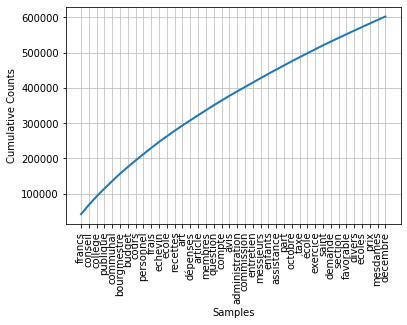

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [23]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

## La thématique choisie se base sur le mots fréquent `école` : Les travaux et discussions sur le secteur de l'education à Bruxelles de [années à choisir]

In [13]:
frequencies = Counter(kept)
print(frequencies.most_common(40))

[('francs', 41362), ('conseil', 26425), ('collège', 24177), ('publique', 22213), ('communal', 21394), ('bourgmestre', 20869), ('budget', 19057), ('cours', 18567), ('personnel', 17950), ('frais', 17639), ('echevin', 17040), ('ecole', 15846), ('recettes', 15780), ('art', 15076), ('dépenses', 14606), ('article', 14305), ('membres', 14217), ('question', 14013), ('compte', 13490), ('avis', 13381), ('administration', 12601), ('commission', 12554), ('entretien', 12533), ('messieurs', 12518), ('enfants', 12336), ('assistance', 11971), ('part', 11899), ('octobre', 11879), ('taxe', 11454), ('école', 11289), ('exercice', 11224), ('saint', 11209), ('demande', 10659), ('section', 10457), ('favorable', 10422), ('divers', 10350), ('écoles', 10195), ('prix', 10080), ('mesdames', 9993), ('décembre', 9827)]


In [14]:
temp_path = '../data/tmp_tp4'
title = 'freq_wordcloud'

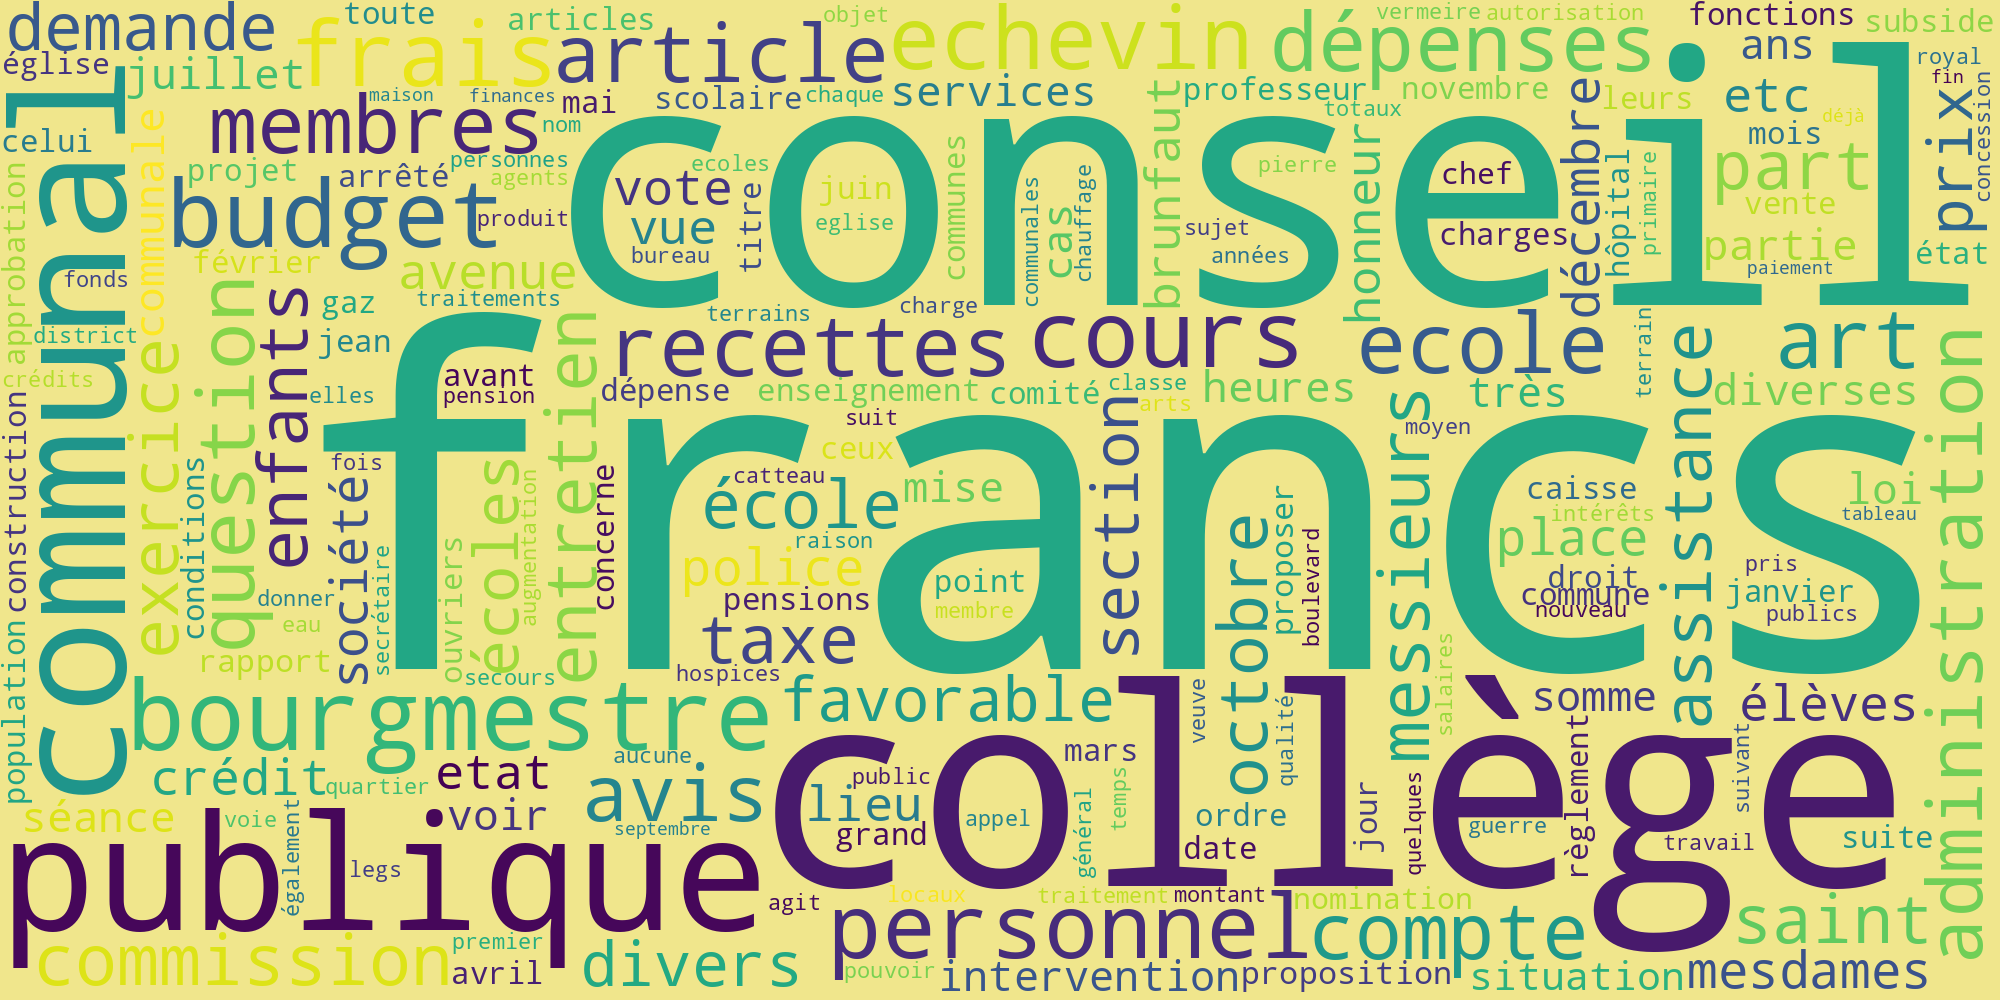

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='khaki').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{title}.png"))
Image(filename=os.path.join(temp_path, f"{title}.png"))